In [63]:
import numpy as np
from matplotlib import pyplot as plt

### Infinite Square Well

In [64]:
N = 1001
def eigenfunction(n, a):
    x_values = np.linspace(-a, a, N)
    if n % 2 == 0:
        return np.sqrt(1/a)*np.sin(n*np.pi*x_values/(2*a))
    return np.sqrt(1/a)*np.cos(n*np.pi*x_values/(2*a))

def prob_density(n, a):
    return np.abs(eigenfunction(n, a))**2

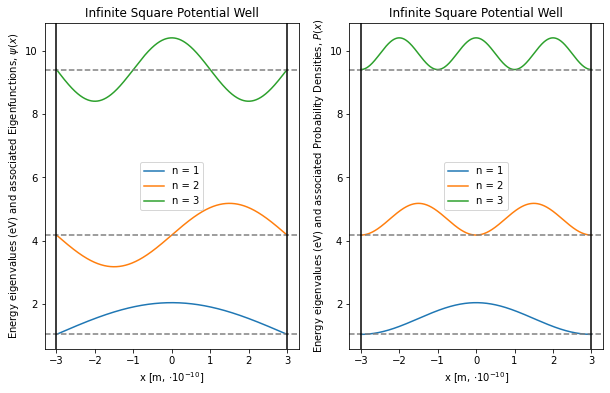

In [70]:
# First three energy levels for an electron trapped inside an infinite 1D potential well:
a = 3e-10
m = 9.109e-31
h_bar = 6.626e-34/(2*np.pi)
x_values = np.linspace(-a, a, N)

E1 = h_bar**2*np.pi**2/(8*m*a**2)/1.602e-19
E2 = 4*h_bar**2*np.pi**2/(8*m*a**2)/1.602e-19
E3 = 9*h_bar**2*np.pi**2/(8*m*a**2)/1.602e-19

psi_values_1 = eigenfunction(1, a)
psi_values_2 = eigenfunction(2, a)
psi_values_3 = eigenfunction(3, a)

prob_values_1 = prob_density(1, a)
prob_values_2 = prob_density(2, a)
prob_values_3 = prob_density(3, a)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x_values/1e-10, np.sqrt(a)*psi_values_1+E1)
ax1.plot(x_values/1e-10, np.sqrt(a)*psi_values_2+E2)
ax1.plot(x_values/1e-10, np.sqrt(a)*psi_values_3+E3)

ax1.axhline(E1, linestyle='--', color='grey')
ax1.axhline(E2, linestyle='--', color='grey')
ax1.axhline(E3, linestyle='--', color='grey')
ax1.axvline(-a/1e-10, color='black')
ax1.axvline(a/1e-10, color='black')
ax1.legend(['n = 1', 'n = 2', 'n = 3'])
ax1.set_xlabel('x [m, $\cdot 10^{-10}$]')
ax1.set_ylabel('Energy eigenvalues (eV) and associated Eigenfunctions, $\psi(x)$')

ax2.plot(x_values/1e-10, a*prob_values_1+E1)
ax2.plot(x_values/1e-10, a*prob_values_2+E2)
ax2.plot(x_values/1e-10, a*prob_values_3+E3)

ax2.axhline(E1, linestyle='--', color='grey')
ax2.axhline(E2, linestyle='--', color='grey')
ax2.axhline(E3, linestyle='--', color='grey')
ax2.axvline(-a/1e-10, color='black')
ax2.axvline(a/1e-10, color='black')
ax2.legend(['n = 1', 'n = 2', 'n = 3'])
ax2.set_xlabel('x [m, $\cdot 10^{-10}$]')
ax2.set_ylabel('Energy eigenvalues (eV) and associated Probability Densities, $P(x)$')

ax1.set_title('Infinite Square Potential Well')
ax2.set_title('Infinite Square Potential Well')
plt.show()

### Numerical approach

-0.0
-16449340.668482263
-32898681.336964525
-49347859.65696173
-65796713.279988825
-82245079.85916306
-98692797.05080633
-115139702.51604746
-131585633.92242447
-148030428.94548678
-164473925.2703974
-180915960.593535
-197356372.6240959
-213794999.08569592
-230231677.71797207
-246666246.27818435
-263098542.5428169
-279528404.30917966
-295955669.39700896
-312380175.6500689
-328801760.93775153
-345220263.15667784
-361635520.23229736
-378047370.12048817
-394455650.80915695
-410860200.3198377
-427260856.7092913
-443657458.0711035
-460049842.53728396
-476437848.2798638
-492821313.51249284
-509200076.49203765
-525573975.5201777
-541942848.9450018
-558306535.162604
-574664872.618679
-591017699.8101176
-607364855.2866001
-623706177.6521915
-640041505.5669341
-656370677.7484407
-672693532.9734873
-689009910.0796037
-705319647.9666667
-721622585.5984888
-737918562.0044091
-754207416.2808826
-770488987.593069
-786763115.1764202
-803029638.3382685
-819288396.4594127
-835539228.995704
-851781975.4

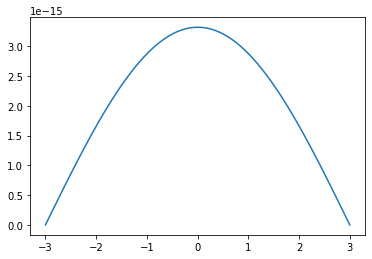

In [82]:
dx = 2*a/(N-1)
E = h_bar**2*np.pi**2/(8*m*a**2)

#def dpsi_dx(psi, tau, x, E):
#    return tau
def dtau_dx(psi, tau, x, E):
    print(-2*m*E*psi/(h_bar**2))
    return -2*m*E*psi/(h_bar**2)

x_values = np.linspace(-a, a, N)
psi, psi[0] = np.zeros(N), 0
tau, tau[0] = np.zeros(N), 1

for i in range(N-1):
    psi[i + 1] = psi[i] + tau[i] * dx
    tau[i + 1] = tau[i] + dtau_dx(psi[i], tau[i], x_values[i + 1], E) * dx

plt.plot(x_values/1e-10, np.sqrt(a)*psi+E)
plt.show()